In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

**PRN**:                  ______________________________<br>
**Name of Student**:      ______________________________<br>
**Date of Submission**:   ______________________________<br>

# Deep Neural Networks
## PG-DAI September  2022


# Evaluation 1


## Instruction:
<div class="alert alert-block alert-warning" style="font-family: Arial; font-size:1.2em;">   
   <b>Follow these instructions carefully.</b>
       <li>Your code shall be free of any compilation error. If your code fails in compilation, your submission will be <b><i>rejected</i></b>.</li>
       <li>Put comments to explain your code. Explain your steps in details.</li>
       <li>Do not <b>REMOVE</b> any cell.If you delete any cell, your submission may become invalid.</li>
       <li>Your code shall be within the lines marked for the purpose.</li>
       <li>Upload the file to the designated location by renaming as <strong>PRN_{PRN # last 3 digits}_DNN_Eval_Assignment_1.ipynb</strong></li>
    </ol>
    <b>Important:</b>Your code shall be between lines marked thus. 
</div>

>`#### START YOUR CODE`
> Feel free to add cell

>`#### END YOUR CODE`

## 1. Import Statements
**Task 1:** Import all the libraries you may need for successful execution of your code.**(2 marks)**

In [2]:
#### START YOUR CODE
# Lets import some libraries
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

%matplotlib inline

#### END YOUR CODE

## 2. Hyper-Parameters and others

**Task 2:** Declare Hyper-Parameters.**(3 marks)**

**Note:** Declaration of Hyper-Parameters else where should be avoided. 

In [3]:
#### START YOUR CODE
# Some basic parameters
inpDir = '../input'
outDir = '../output'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 100 # number of epochs
ALPHA = 0.1 # learning rate
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'brg' # plt.cm.Spectral

plt.rcParams.update(params)

#### END YOUR CODE

## Helper Function
Following helper function is given for your convenience. Feel free to modify as deemed fit.

In [4]:
def fn_plot_hist(hist_df):
    
    # Instantiate plt object with 1 row two columns
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) 

    # Propertiesfor matplotlib.patch.Patch 
    props = dict(boxstyle='round', 
                 facecolor='aqua', 
                 alpha=0.4)

    ax = axes[0]

    # plot loss columns of the dataframe
    hist_df.plot(y = ['loss','val_loss'], ax = ax, colormap=CMAP)

    # Mark min loss and min val_loss
    lossmin = hist_df['loss'].min()
    testmin = hist_df['val_loss'].min()

    # Little beautification
    txtstr = "Min Loss: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(lossmin,
                                                                            testmin) #text to plot

    # Place a text box in upper left in axis coords
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # set labels on the axes
    ax.set_xlabel("Epochs")

    ax.set_ylabel("Loss")

    # show grid
    ax.grid();

    # for second figure
    ax = axes[1]

    # plot accuracy and val_accuracy
    hist_df.plot( y = ['accuracy', 'val_accuracy'], ax = ax, colormap=CMAP)
    

    # get max accuracies
    accmax = hist_df['accuracy'].max()
    testmax = hist_df['val_accuracy'].max()
    
    # Little beautification
    txtstr = "Max Accuracy: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(accmax,
                                                                                testmax) #text to plot

    # place a text box in upper left in axis coords
    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark labels
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    
    # Show grid
    ax.grid();
    
    # Organise subplot params so that the subplots fit in to the figure area
    plt.tight_layout()

## Dataset Information:

### Reference
[Wine DataSet](https://archive.ics.uci.edu/ml/datasets/wine)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it )
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


### Attribute Information:

All attributes are continuous

**NOTE:** 1st attribute is class identifier (1-3)

## Load Data
**Task 3:** Load data provided in `wines.data` with appropriate column names. **(5 marks)**

**Note:** 
1. Use of any **other** dataset will make this submission **invalid**.
2. The information provided in this Notebook is sufficient to enter column names.
3. You may also use `wine.names` file for column names

In [5]:
#### START YOUR CODE
cols = ['Class',
        'Alcohol', 
        'Malic acid',
        'Ash',
        'Alcalinity of ash',
        'Magnesium',
        'Total phenols',
        'Flavanoids',
        'Nonflavanoid phenols',
        'Proanthocyanins',
        'Color intensity',
        'Hue',
        'OD280/OD315 of diluted wines',
        'Proline']
df = pd.read_csv(os.path.join(inpDir, 'wine.data'), header=None)
df.columns = cols
df.head()
#### END YOUR CODE

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Train and Test Sets
**Task 4**: Prepare train and test sets from the data, namely - X_test, X_train,  y_train, y_test **(5 marks)**

In [6]:
#### START YOUR CODE
y = df['Class'].to_numpy()
X = df.drop('Class', axis =1).to_numpy()

#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

#### END YOUR CODE

(142, 13) (142,) (36, 13) (36,)


## Declare your model

**Task 5:**
1. Specify kernel initializer.
2. Prepare model using Sequential class of TensorFlow with one Hidden Layer and one output layer

$
\begin{align}
Marks = \left\{
\begin{array}{cl}
\text{for Specify kernel initializer}&= 2\\
\text{for preparing model appropriately}&= 3.\\
\end{array}
\right.
\end{align}
$

In [7]:
#### START YOUR CODE
krnl_init = tf.keras.initializers.GlorotUniform(
                                   seed=RANDOM_STATE
                                   )

# Define sequential model with same size and activation functions
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='tanh', kernel_initializer=krnl_init),
  tf.keras.layers.Dense(3, kernel_initializer=krnl_init)
])

# Using cross entropy for loss calculations
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#### END YOUR CODE

2022-12-27 10:29:17.409625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 10:29:17.435292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 10:29:17.435462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 10:29:17.436305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Compile and Fit your model

**Task 6:**
1. Plot loss and accuracy curves for both testing and training. **(5 marks)**

Epoch 1/100
5/5 - 1s - loss: 1.3895 - accuracy: 0.3310 - val_loss: 1.3861 - val_accuracy: 0.1944 - 767ms/epoch - 153ms/step
Epoch 2/100
5/5 - 0s - loss: 1.3389 - accuracy: 0.3451 - val_loss: 1.3309 - val_accuracy: 0.1944 - 19ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.2914 - accuracy: 0.3592 - val_loss: 1.2779 - val_accuracy: 0.2222 - 18ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 1.2460 - accuracy: 0.4014 - val_loss: 1.2270 - val_accuracy: 0.3056 - 24ms/epoch - 5ms/step
Epoch 5/100
5/5 - 0s - loss: 1.2009 - accuracy: 0.4296 - val_loss: 1.1788 - val_accuracy: 0.3611 - 19ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 1.1603 - accuracy: 0.4648 - val_loss: 1.1311 - val_accuracy: 0.3889 - 18ms/epoch - 4ms/step
Epoch 7/100


2022-12-27 10:29:18.490782: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5/5 - 0s - loss: 1.1180 - accuracy: 0.4930 - val_loss: 1.0861 - val_accuracy: 0.4167 - 18ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 1.0794 - accuracy: 0.5141 - val_loss: 1.0428 - val_accuracy: 0.4444 - 17ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 1.0408 - accuracy: 0.5352 - val_loss: 1.0016 - val_accuracy: 0.4722 - 17ms/epoch - 3ms/step
Epoch 10/100
5/5 - 0s - loss: 1.0057 - accuracy: 0.5423 - val_loss: 0.9615 - val_accuracy: 0.4722 - 17ms/epoch - 3ms/step
Epoch 11/100
5/5 - 0s - loss: 0.9698 - accuracy: 0.5634 - val_loss: 0.9239 - val_accuracy: 0.5000 - 18ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 0.9378 - accuracy: 0.5915 - val_loss: 0.8877 - val_accuracy: 0.5556 - 19ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 0.9045 - accuracy: 0.6197 - val_loss: 0.8539 - val_accuracy: 0.6667 - 17ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.8749 - accuracy: 0.6408 - val_loss: 0.8216 - val_accuracy: 0.6944 - 17ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 0.8452 - 

Epoch 75/100
5/5 - 0s - loss: 0.1975 - accuracy: 0.9718 - val_loss: 0.1666 - val_accuracy: 0.9722 - 18ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.1941 - accuracy: 0.9718 - val_loss: 0.1638 - val_accuracy: 0.9722 - 18ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 0.1908 - accuracy: 0.9718 - val_loss: 0.1609 - val_accuracy: 0.9722 - 17ms/epoch - 3ms/step
Epoch 78/100
5/5 - 0s - loss: 0.1875 - accuracy: 0.9718 - val_loss: 0.1581 - val_accuracy: 0.9722 - 17ms/epoch - 3ms/step
Epoch 79/100
5/5 - 0s - loss: 0.1844 - accuracy: 0.9718 - val_loss: 0.1554 - val_accuracy: 0.9722 - 17ms/epoch - 3ms/step
Epoch 80/100
5/5 - 0s - loss: 0.1811 - accuracy: 0.9718 - val_loss: 0.1529 - val_accuracy: 0.9722 - 18ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - loss: 0.1782 - accuracy: 0.9789 - val_loss: 0.1504 - val_accuracy: 0.9722 - 18ms/epoch - 4ms/step
Epoch 82/100
5/5 - 0s - loss: 0.1753 - accuracy: 0.9789 - val_loss: 0.1480 - val_accuracy: 0.9722 - 18ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - 

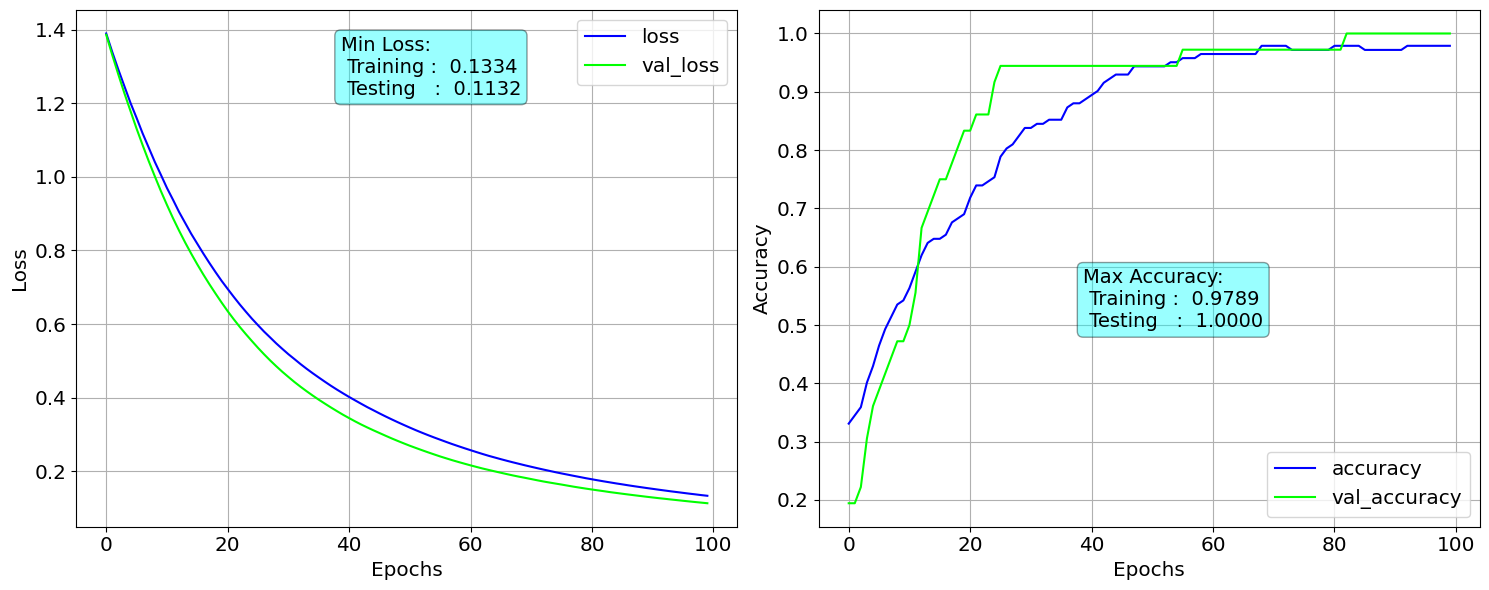

In [8]:
#### START YOUR CODE

model.compile(optimizer='Adam',
              loss=loss_fn,
              metrics=['accuracy'])
              
history = model.fit(X_train, y_train ,
                    validation_data = [X_test, y_test],
                    epochs = EPOCHS, verbose =2)
res_df = pd.DataFrame(history.history)
fn_plot_hist(res_df)
#### END YOUR CODE

## Summary of analysis

**Task 7:** 
1. Comment on loss curve. Is data provided  sufficient to train the model? Comment from the perspective of under-fitting/over-fitting.**(5 marks)**
2. Have you used any data transformation such as Scaler etc.? Please Explain. **(10 marks)**

In [9]:
#Explanation Task 7.1

In [10]:
#Explanation Task 7.2

## Reinforcement Learning

**Task 8:** 
1. Explain difference between Bellman Expectation Equation and Bellman Optimization Equation.**(5 marks)**

**Explanation Task 8** : Bellman Optimality equation is the same as Bellman Expectation Equation but the only difference is instead of taking the average of the actions our agent can take we take the action with the max value.